In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import config

In [3]:
df = pd.read_csv(config.TRAIN_FOLDS)

In [4]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,kfold
0,FO27LBAN,Female,82,RG251,Other,X2,51,Yes,441769,No,0,0
1,AJ9PANHI,Male,52,RG280,Self_Employed,X3,62,No,661554,No,0,0
2,HY8ZRRB9,Male,31,RG284,Salaried,X1,25,Yes,2151922,No,0,0
3,ORLPS7JG,Female,33,RG268,Self_Employed,X1,27,No,2525072,No,0,0
4,D2JZQYRX,Male,30,RG251,Salaried,X1,19,No,2156763,No,0,0


### Target Analysis

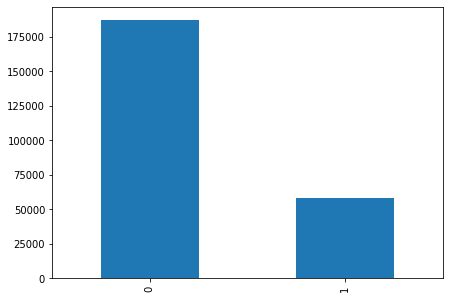

In [5]:
plt.figure(figsize=(7,5))
df["Is_Lead"].value_counts().plot(kind='bar')
plt.show()

imbalance target distribution  
- need to do stratified k fold 
- metric will be roc_auc

### Feature analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
 11  kfold                245725 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 22.5+ MB


In [7]:
cat_cols = ["Gender","Region_Code","Occupation","Channel_Code","Credit_Product","Is_Active"]

In [8]:
num_cols = ["Age","Vintage","Avg_Account_Balance"]

In [9]:
target = "Is_Lead"

### Missing values

In [10]:
df[cat_cols].isna().sum()

Gender                0
Region_Code           0
Occupation            0
Channel_Code          0
Credit_Product    29325
Is_Active             0
dtype: int64

In [11]:
df.shape

(245725, 12)

In [12]:
df["Credit_Product"].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [13]:
df["Credit_Product"].isna().sum()

29325

In [14]:
29325/245725 * 100

11.9340726421813

The missing value numbers is more then 10%, so we cannot use deletion of all nan valued rows.  
- We can use NaN as a new category all together

In [15]:
df["Credit_Product"] = df["Credit_Product"].astype(str).fillna("NONE")

In [16]:
df["Credit_Product"].value_counts()

No     144357
Yes     72043
nan     29325
Name: Credit_Product, dtype: int64

### Categorical Analysis

C:\Users\beher\anaconda3\envs\all\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


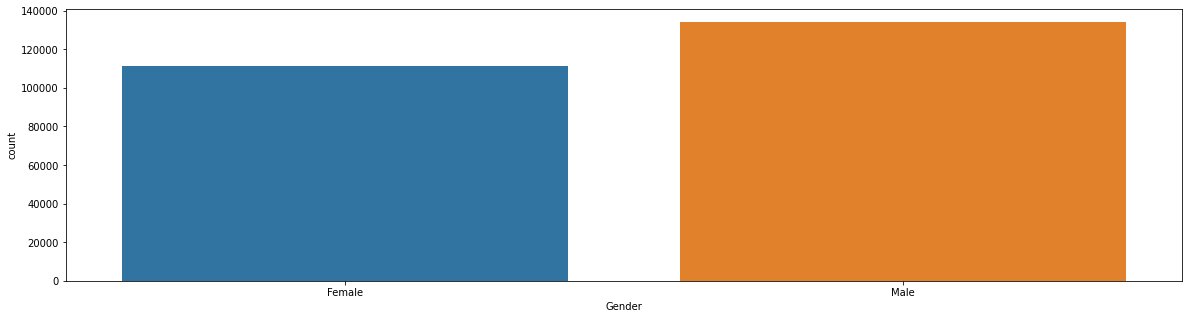

In [35]:
plt.figure(figsize=(20,5))
sns.countplot(df[cat_cols[0]])
plt.show()

C:\Users\beher\anaconda3\envs\all\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


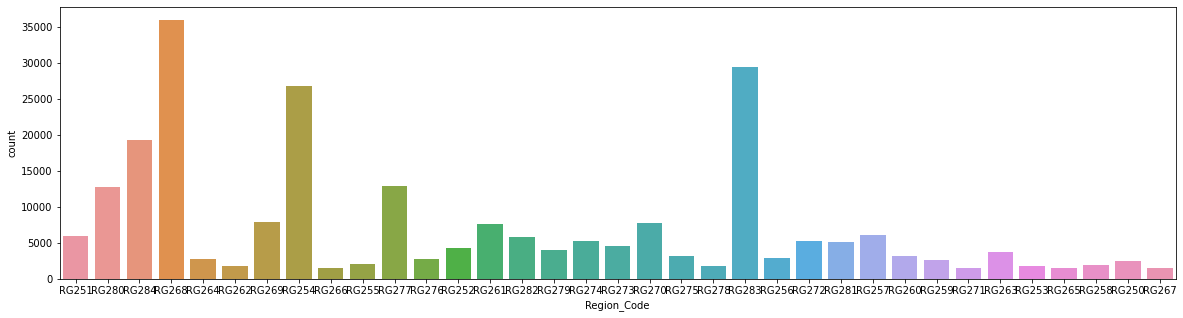

In [36]:
plt.figure(figsize=(20,5))
sns.countplot(df[cat_cols[1]])
plt.show()

C:\Users\beher\anaconda3\envs\all\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


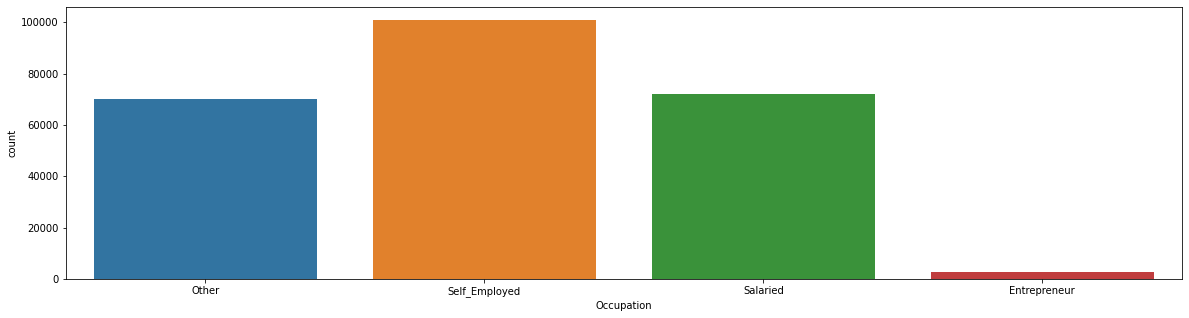

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(df[cat_cols[2]])
plt.show()

C:\Users\beher\anaconda3\envs\all\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


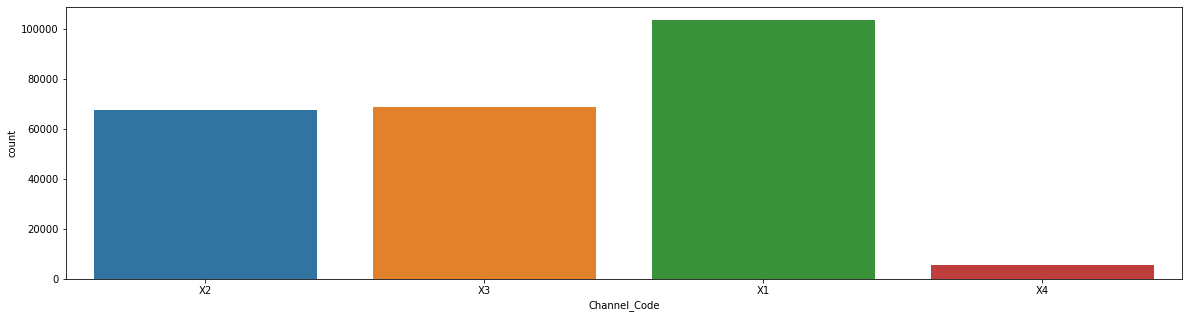

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(df[cat_cols[3]])
plt.show()

C:\Users\beher\anaconda3\envs\all\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


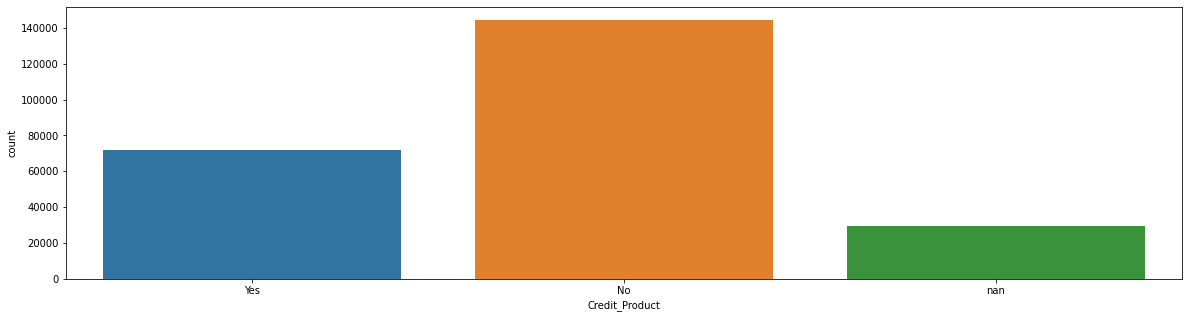

In [39]:
plt.figure(figsize=(20,5))
sns.countplot(df[cat_cols[4]])
plt.show()

C:\Users\beher\anaconda3\envs\all\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


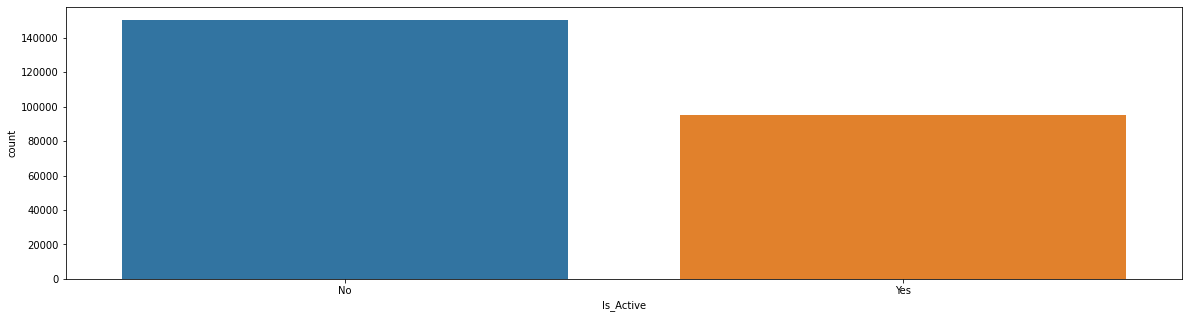

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(df[cat_cols[5]])
plt.show()

Feature engineering  
- Region_code : frequency encoding
- Gender,Occupation,Channel_Code,Credit_Product,Is_Active : One Hot Encoding

### Numerical Analysis

In [42]:
df[num_cols].head(10)

,Age,Vintage,Avg_Account_Balance
0,82,51,441769
1,52,62,661554
2,31,25,2151922
3,33,27,2525072
4,30,19,2156763
5,59,110,997974
6,37,27,721158
7,28,19,6293065
8,47,62,1215651
9,55,37,718069


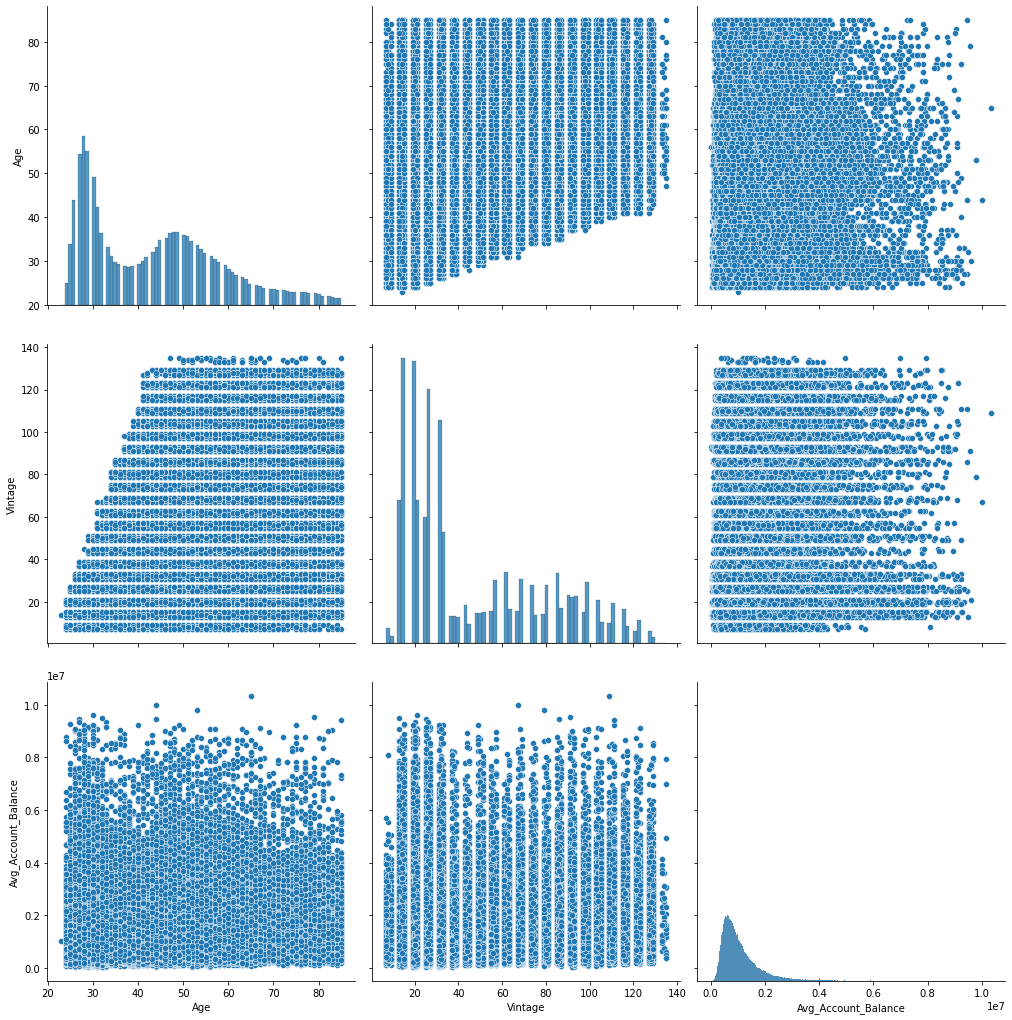

In [46]:
g = sns.pairplot(df[num_cols])
g.fig.set_size_inches(15,15)

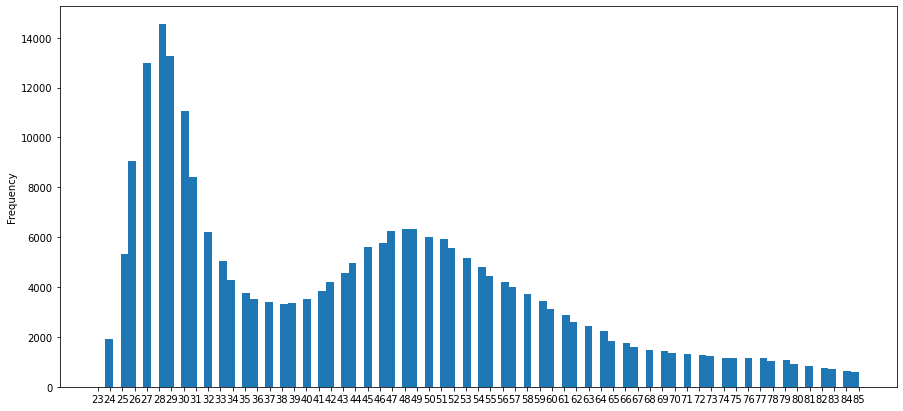

In [52]:
x = df["Age"].values
plt.figure(figsize=(15,7))
df["Age"].plot(kind='hist',bins=100)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

Looks like 38 is the minima of this bimodal distribution

Feature engineering  
- Avg_Account_Balance : yao-jhonson transform or boxcox transform
- Age : can be converted to categorical
- Vintage : no transform